## Run data pipeline
Returns an aggegrated df to work with

In [1]:
# Only for Wesley %run "./Data"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Copy this cell to every new version of Main
#import dataframe
df_hourly = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Complete_Set/HECTORdataAggregated_Hourly_20240331152619.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df_hourly)}")

Number of rows in the file: 2667


## Import utilities
Import custom function

In [4]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [5]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [6]:
#Copy this cell to every new version of Main
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Copy this cell to every new version of Main
df_hourly

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2023-04-29 12,2023-04-29 12:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2663,2023-04-29 13,2023-04-29 13:59:59.830000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2664,2023-04-29 14,2023-04-29 14:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2665,2023-04-29 15,2023-04-29 15:59:59.920000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0


In [7]:
df_hourly

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2023-04-29 12,2023-04-29 12:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2663,2023-04-29 13,2023-04-29 13:59:59.830000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2664,2023-04-29 14,2023-04-29 14:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2665,2023-04-29 15,2023-04-29 15:59:59.920000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0


In [8]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df_hourly['Vdatetime'].min()
max_datetime = df_hourly['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df_hourly.shape
print(df_hourly.shape)

Minimum datetime: 2022-08-01 04
Maximum datetime: 2023-04-29 16
(2667, 23)


In [10]:
 # Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df_hourly.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df_hourly.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df_hourly.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)



Aantal NaN per kolom:
Vdatetime           0
datetime            0
BatSOC              6
ThrottlePerc        6
RearAxle1           6
H2Weight            6
MotorRPM            6
MotorTorque         6
MotorTemp           0
BattOutputPower     6
MotorPowerDraw      6
TotalFCPower       13
ActualSpeed         6
TotalPowerDraw      6
DayOfWeek           0
AirTemp             0
Is_Friday           0
Is_Monday           0
Is_Saturday         0
Is_Sunday           0
Is_Thursday         0
Is_Tuesday          0
Is_Wednesday        0
dtype: int64

Heeft DataFrame NaN-waarden?
True

Totaal aantal NaN-waarden in DataFrame:
73


In [11]:
df = df_hourly
df = df.dropna()

column_names = df.columns.tolist()

# This will print the list of column names
print(column_names)

['Vdatetime', 'datetime', 'BatSOC', 'ThrottlePerc', 'RearAxle1', 'H2Weight', 'MotorRPM', 'MotorTorque', 'MotorTemp', 'BattOutputPower', 'MotorPowerDraw', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'DayOfWeek', 'AirTemp', 'Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday']


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#features to keep "BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", "MotorPowerDraw", "ActualSpeed", "TotalPowerDraw", "AirTemp"

# Verwijder niet-noodzakelijke kolommen en splits de data
X = df.drop(['Vdatetime','datetime', 'TotalPowerDraw', 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd
y = df['TotalPowerDraw']

# Normaliseer de data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Splits de data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,ActualSpeed,AirTemp
2106,99.999236,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,651.265764,0.000000,-0.238787,0.000000,6.8
904,31.835833,103.503889,4466.062500,9560.479931,83.425625,176.707917,65.190895,-7877.450000,12639.898138,24421.511971,14.599484,9.3
2261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,-0.250000,0.000000,7.2
1146,78.309220,225.814947,9052.834555,4481.356732,165.405345,688.217551,72.714838,6503.653141,40951.706442,39655.554812,28.945935,15.2
1818,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,615.024722,0.000000,-0.243302,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,624.645992,0.000000,-0.191370,0.000000,6.6
1108,62.484306,150.230000,9404.493056,2078.658056,124.719375,313.520972,67.482431,4579.887292,21119.983306,24829.587248,21.825891,19.6
1143,36.026899,169.147612,5467.929198,10261.941147,145.617606,368.633121,83.046873,-19687.176289,28657.148831,53111.706106,25.483081,15.2
1307,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,654.519064,0.000000,-0.200809,0.000000,6.7


In [14]:
y

0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2662        0.000000
2663        0.000000
2664        0.000000
2665        0.000000
2666        0.000000
Name: TotalPowerDraw, Length: 2654, dtype: float64

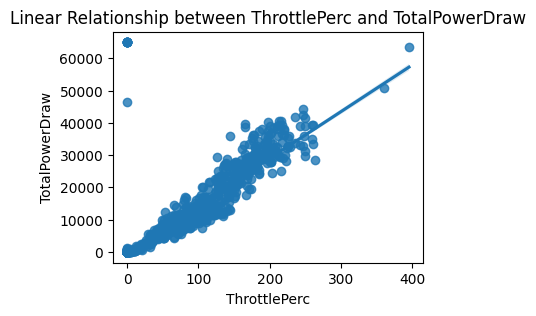

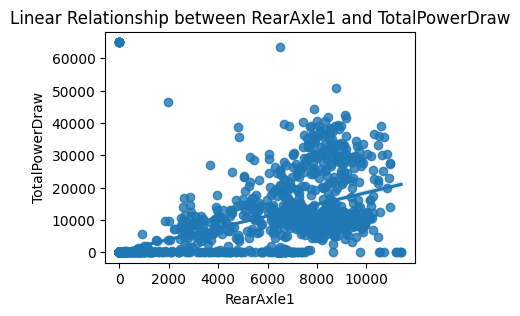

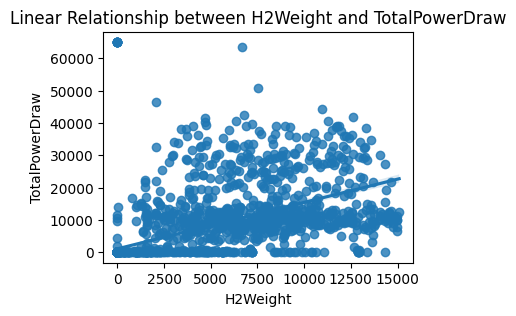

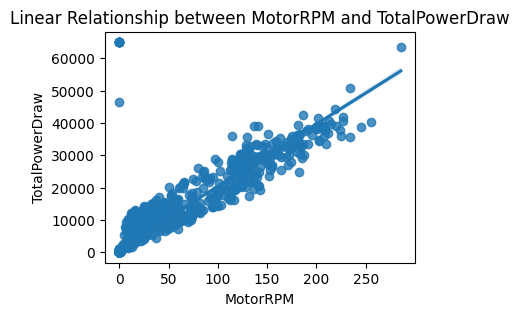

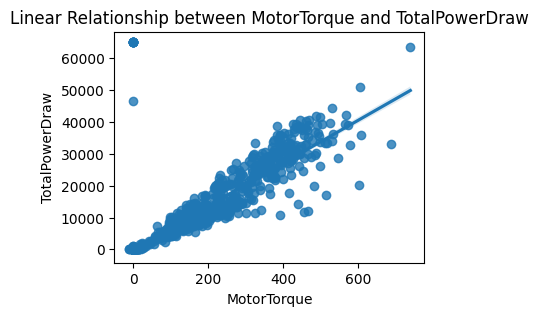

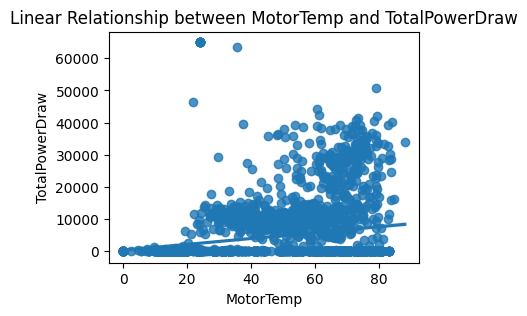

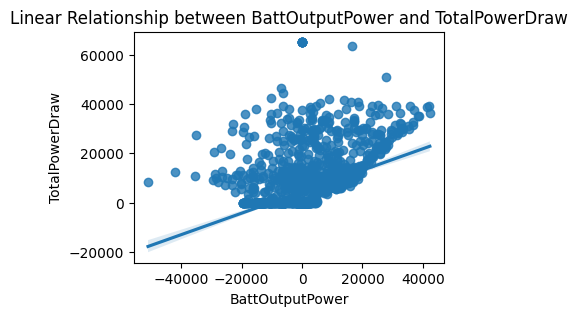

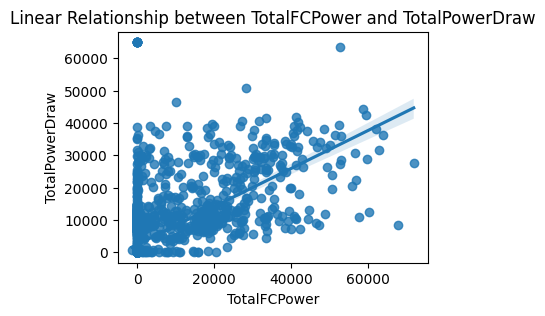

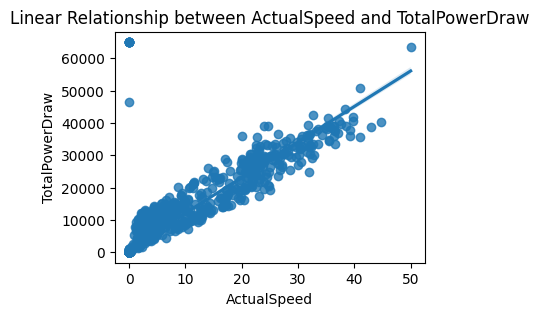

Plotting the linear relationship between Throttle Percentage and Total Power Draw...


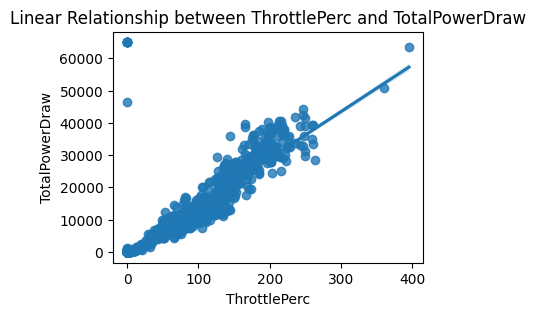

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


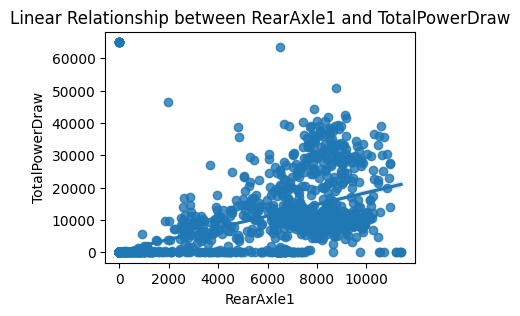

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


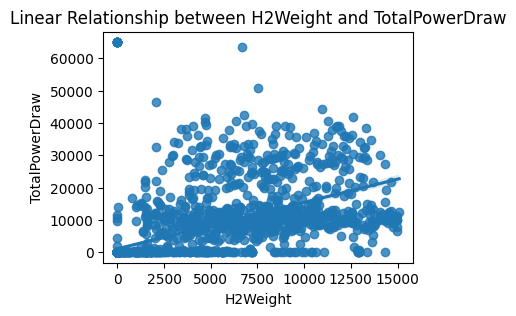

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


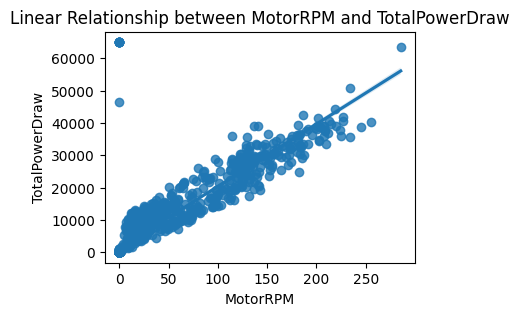

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


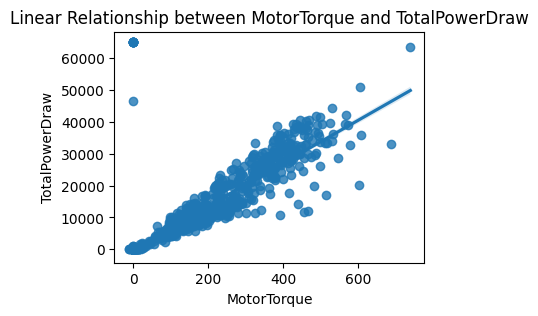

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


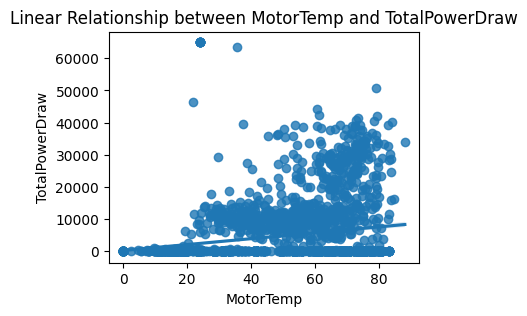

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..


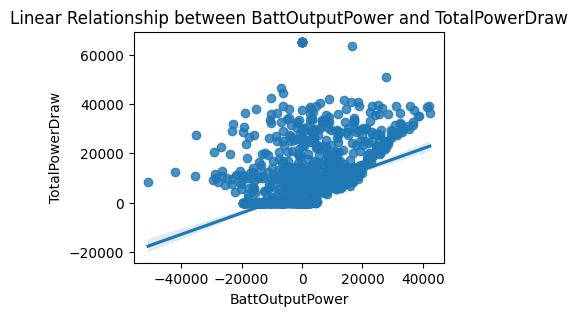

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


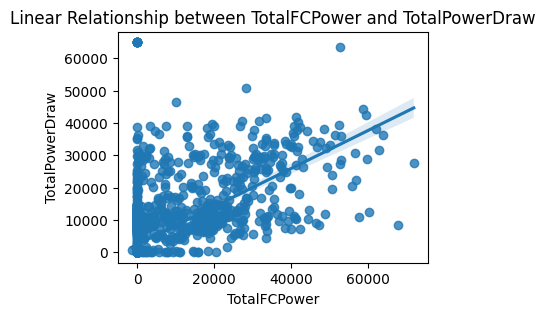

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


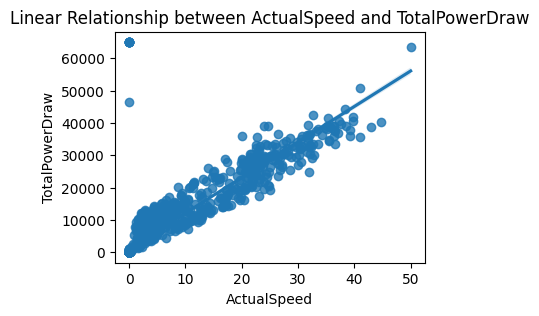

In [18]:
#check linear relationship,

def plot_linear_relationships(df, x_col, y_col, figsize=(4, 3)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df_hourly)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df, 'ThrottlePerc','TotalPowerDraw')
plot_linear_relationships(df, 'RearAxle1','TotalPowerDraw')
plot_linear_relationships(df, 'H2Weight','TotalPowerDraw')
plot_linear_relationships(df, 'MotorRPM','TotalPowerDraw')
plot_linear_relationships(df, 'MotorTorque','TotalPowerDraw')
plot_linear_relationships(df, 'MotorTemp','TotalPowerDraw')
plot_linear_relationships(df, 'BattOutputPower','TotalPowerDraw')
plot_linear_relationships(df, 'TotalFCPower','TotalPowerDraw')
plot_linear_relationships(df, 'ActualSpeed','TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and Total Power Draw...")
plot_linear_relationships(df, 'ThrottlePerc', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'RearAxle1', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df, 'H2Weight', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorRPM', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorTorque', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'MotorTemp', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..")
plot_linear_relationships(df, 'BattOutputPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'TotalFCPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df, 'ActualSpeed', 'TotalPowerDraw')



In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming X_train and y_train are defined and aligned

# Make an instance of StandardScaler
scaler = StandardScaler()

# Scale the independent variables (X)
X_scaled = scaler.fit_transform(X_train)

# Add a constant for the intercept
X_scaled_with_const = sm.add_constant(X_scaled)

# Apply the OLS model
model = sm.OLS(y_train, X_scaled_with_const).fit()  # Use y_train to match X_train

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         TotalPowerDraw   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:14:48   Log-Likelihood:                -20416.
No. Observations:                2123   AIC:                         4.086e+04
Df Residuals:                    2111   BIC:                         4.092e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4479.9606     79.044     56.677      0.0

In [25]:
# Get the feature names from the original DataFrame
feature_names = X_train.columns.tolist()

# Since 'sm.add_constant' adds a constant at the beginning, add 'const' to the feature names list
feature_names_with_const = ['const'] + feature_names

# Convert the numpy array back to a pandas DataFrame and add the column names
X_scaled_with_const_df = pd.DataFrame(X_scaled_with_const, columns=feature_names_with_const)

# Now X_scaled_with_const_df is a DataFrame with headers
print(X_scaled_with_const_df.head())
#To compare the scaled set with the unscaled set X_train , order the lines in the same order
X_scaled_with_const_df = X_scaled_with_const_df.set_index(X_train.index)
X_scaled_with_const_df
#To compare the scaled set with the unscaled set X_train , order the lines in the same order
X_scaled_with_const_df = X_scaled_with_const_df.set_index(X_train.index)
X_scaled_with_const_df

   const    BatSOC  ThrottlePerc  RearAxle1  H2Weight  MotorRPM  MotorTorque  \
0    1.0  0.928179     -0.537837  -0.664512 -0.614456 -0.422375    -0.524545   
1    1.0 -1.055073      1.270935   0.595560  1.786225  1.573691     0.902369   
2    1.0 -1.981354     -0.537837  -0.664512 -0.614456 -0.422375    -0.524545   
3    1.0  0.297096      3.408370   1.889690  0.510834  3.535161     5.032799   
4    1.0  0.288099     -0.537837  -0.664512 -0.614456 -0.422375    -0.524545   

   MotorTemp  BattOutputPower  MotorPowerDraw  TotalFCPower  ActualSpeed  \
0   1.200750         0.028337       -0.442968     -0.374286    -0.422375   
1   0.744664        -0.905217        1.107552      2.052507     1.573691   
2  -1.246542        -0.042951       -0.442968     -0.374287    -0.422375   
3   1.062134         0.668939        4.580524      3.566317     3.535161   
4  -1.499710         0.024370       -0.442968     -0.374286    -0.422375   

    AirTemp  
0 -0.531720  
1 -0.182221  
2 -0.475800  
3  0.6

,const,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,ActualSpeed,AirTemp
2106,1.0,0.928179,-0.537837,-0.664512,-0.614456,-0.422375,-0.524545,1.200750,0.028337,-0.442968,-0.374286,-0.422375,-0.531720
904,1.0,-1.055073,1.270935,0.595560,1.786225,1.573691,0.902369,0.744664,-0.905217,1.107552,2.052507,1.573691,-0.182221
2261,1.0,-1.981354,-0.537837,-0.664512,-0.614456,-0.422375,-0.524545,-1.246542,-0.042951,-0.442968,-0.374287,-0.422375,-0.475800
1146,1.0,0.297096,3.408370,1.889690,0.510834,3.535161,5.032799,1.062134,0.668939,4.580524,3.566317,3.535161,0.642599
1818,1.0,0.288099,-0.537837,-0.664512,-0.614456,-0.422375,-0.524545,-1.499710,0.024370,-0.442968,-0.374286,-0.422375,-1.412460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,1.0,0.462672,-0.537837,-0.664512,-0.614456,-0.422375,-0.524545,-1.204347,0.025423,-0.442968,-0.374281,-0.422375,-0.559680
1108,1.0,-0.163339,2.087493,1.988908,-0.092495,2.561697,2.007131,0.841354,0.458364,2.147793,2.093058,2.561697,1.257718
1143,1.0,-0.933132,2.418086,0.878231,1.962365,3.061714,2.452161,1.498091,-2.197910,3.072367,4.903456,3.061714,0.642599
1307,1.0,0.928201,-0.537837,-0.664512,-0.614456,-0.422375,-0.524545,0.863193,0.028693,-0.442968,-0.374282,-0.422375,-0.545700


In [20]:
X_train

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,ActualSpeed,AirTemp
2106,99.999236,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,651.265764,0.000000,-0.238787,0.000000,6.8
904,31.835833,103.503889,4466.062500,9560.479931,83.425625,176.707917,65.190895,-7877.450000,12639.898138,24421.511971,14.599484,9.3
2261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,-0.250000,0.000000,7.2
1146,78.309220,225.814947,9052.834555,4481.356732,165.405345,688.217551,72.714838,6503.653141,40951.706442,39655.554812,28.945935,15.2
1818,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,615.024722,0.000000,-0.243302,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,624.645992,0.000000,-0.191370,0.000000,6.6
1108,62.484306,150.230000,9404.493056,2078.658056,124.719375,313.520972,67.482431,4579.887292,21119.983306,24829.587248,21.825891,19.6
1143,36.026899,169.147612,5467.929198,10261.941147,145.617606,368.633121,83.046873,-19687.176289,28657.148831,53111.706106,25.483081,15.2
1307,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,654.519064,0.000000,-0.200809,0.000000,6.7


In [20]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_scaled.shape)
print(type(X_scaled))
print(y.shape)
print(type(y))

(2123, 12)
<class 'numpy.ndarray'>
(2654,)
<class 'pandas.core.series.Series'>


In [21]:
#Check that X_scaled is scaled 
print(X_scaled)
#X is scaled
y
print(y)
#y is not scaled

[[ 0.92817912 -0.53783722 -0.664512   ... -0.37428604 -0.42237462
  -0.53172032]
 [-1.05507315  1.27093516  0.59556017 ...  2.05250726  1.57369099
  -0.18222057]
 [-1.98135449 -0.53783722 -0.664512   ... -0.37428715 -0.42237462
  -0.47580036]
 ...
 [-0.93313175  2.4180858   0.87823072 ...  4.90345645  3.06171429
   0.64259882]
 [ 0.92820134 -0.53783722 -0.664512   ... -0.37428226 -0.42237462
  -0.54570031]
 [ 0.92820134 -0.53783722 -0.664512   ... -0.37427386 -0.42237462
   0.02747927]]
0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2662        0.000000
2663        0.000000
2664        0.000000
2665        0.000000
2666        0.000000
Name: TotalPowerDraw, Length: 2654, dtype: float64


In [ ]:
END OF PREPROCESSING

In [22]:
#check which format the dataset is
print(type(X_scaled))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [23]:
#check which format the dataset is
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_scaled.shape)
print(type(X_scaled))
print(y.shape)
print(type(y))

(2654, 12)
<class 'numpy.ndarray'>
(2654,)
<class 'pandas.core.series.Series'>


In [25]:
#Check that X_scaled is scaled 
print(X_scaled)
#X is scaled
y
print(y)
#y is not scaled


[[ 1.          0.57972339  1.0908756  ...  0.60686722  0.32970448
   1.38752209]
 [ 1.          0.40816042  0.63609057 ...  0.00251042 -0.17640908
   1.38752209]
 [ 1.         -0.40269353  1.15537973 ...  0.72036328  0.455761
   1.38752209]
 ...
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]]
0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2662        0.000000
2663        0.000000
2664        0.000000
2665        0.000000
2666        0.000000
Name: TotalPowerDraw, Length: 2654, dtype: float64


END OF PREPROCESSING    

RANDOM FOREST to capture nonlinear relationships and interaction between features

In [24]:
#find the best hyperparamters 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500]  # You can adjust this list based on your computational budget
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best number of trees
print("Best number of trees (n_estimators):", best_rf.n_estimators)

# Optionally, evaluate its performance on the test set
predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Test MSE for the best model:", mse)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=50; total time=   0.7s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.7s
[CV] END ....................................n_estimators=50; total time=   0.7s
[CV] END ...................................n_estimators=100; total time=   1.3s
[CV] END ...................................n_est

In [25]:
#Run RandomForestRegressor with Best number of trees (n_estimators): 200
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Create the RandomForestRegressor object
# n_estimators is the number of trees in the forest, you can adjust this and other parameters as needed
random_forest_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_train_pred = random_forest_regressor.predict(X_train)
y_test_pred = random_forest_regressor.predict(X_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {test_r2:.3f}")

# Feature Importance
feature_importances = random_forest_regressor.feature_importances_
# Assuming you want to print feature importance
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.3f}")



Training MSE: 339126.045
Test MSE: 872634.084
Training R^2: 0.996
Test R^2: 0.991
Feature Importances:
Feature 0: 0.005
Feature 1: 0.086
Feature 2: 0.002
Feature 3: 0.001
Feature 4: 0.001
Feature 5: 0.070
Feature 6: 0.097
Feature 7: 0.003
Feature 8: 0.695
Feature 9: 0.033
Feature 10: 0.001
Feature 11: 0.007


RF Training MSE: 339126.045
RF Test MSE: 872634.084
RF Training R^2: 0.996
RF Test R^2: 0.991


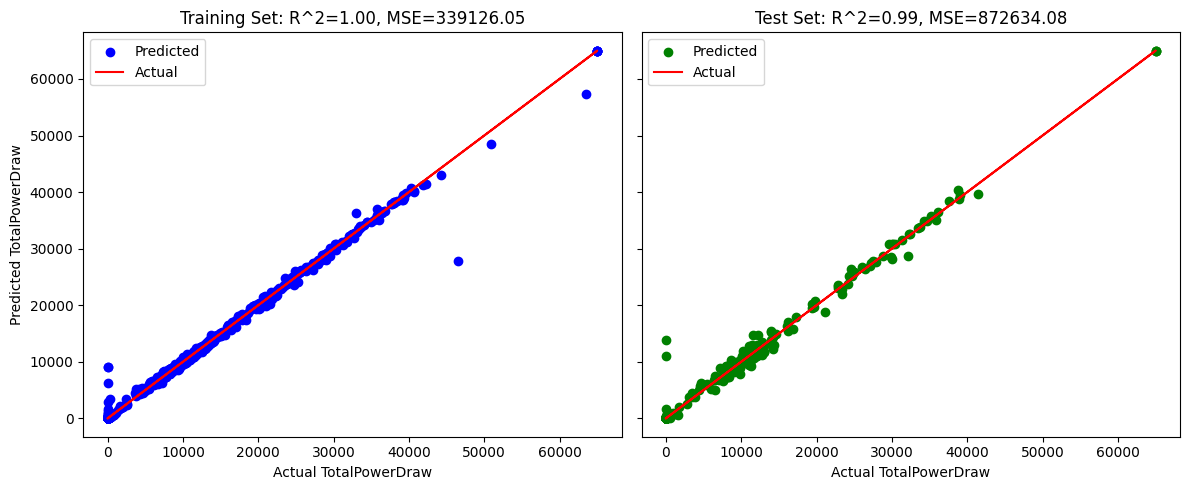

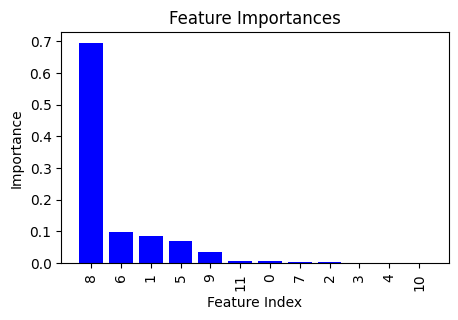

In [27]:
#Random Forest for Regressions

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# defined y_train, y_train_pred, y_test, and y_test_pred from your model's predictions

# Calculate the performance metrics for the training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Calculate and print performance metrics
print(f"RF Training MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RF Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RF Training R^2: {r2_score(y_train, y_train_pred):.3f}")
print(f"RF Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
ax[0].plot(y_train, y_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual TotalPowerDraw')
ax[0].set_ylabel('Predicted TotalPowerDraw')
ax[0].legend()

# Test set plot
ax[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
ax[1].plot(y_test, y_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual TotalPowerDraw')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(5, 3))
indices = np.argsort(feature_importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), np.array(range(X_train.shape[1]))[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


In [35]:
#Apply the Random forest model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", "MotorPowerDraw", "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions

y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


In [36]:
selected_columns_TPD = df_with_predictions[['datetime', 'TotalPowerDraw', 'Predicted_TotalPowerDraw']]

In [39]:
import pandas as pd

# Assuming 'df', 'model', 'X_train', and 'random_forest_regressor' are already defined

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", "MotorPowerDraw", "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# Merge the predictions back into the original DataFrame
df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions['Percentage_Difference'] = (abs(df_with_predictions['TotalPowerDraw'] - df_with_predictions['Predicted_TotalPowerDraw']) / df_with_predictions['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions['Percentage_Difference'] = df_with_predictions['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print(df_with_predictions[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])




      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13308.977260               2.946606
1        9444.155245               8900.613721               5.755322
2       12075.898738              12422.533043               2.870464
3       40680.984837              40067.393660               1.508300
4        5412.054734               5189.745421               4.107669
...              ...                       ...                    ...
2662        0.000000                  0.020000                    NaN
2663        0.000000                  0.020000                    NaN
2664        0.000000                  0.020000                    NaN
2665        0.000000                  0.020000                    NaN
2666        0.000000                  0.020000                    NaN

[2654 rows x 3 columns]


GBM (Gradient Boosting Machine) , sequentally adds predictors (as in descision trees) whee every added feature corrects its predecessor, thereby imprving the models accuraty step by step.  GBM iteratively reduce errors using multiple weak learners, making it highly effective for a wide range of problems, 

Training MSE: 672485.064
Test MSE: 1073686.667
Training R^2: 0.992
Test R^2: 0.989


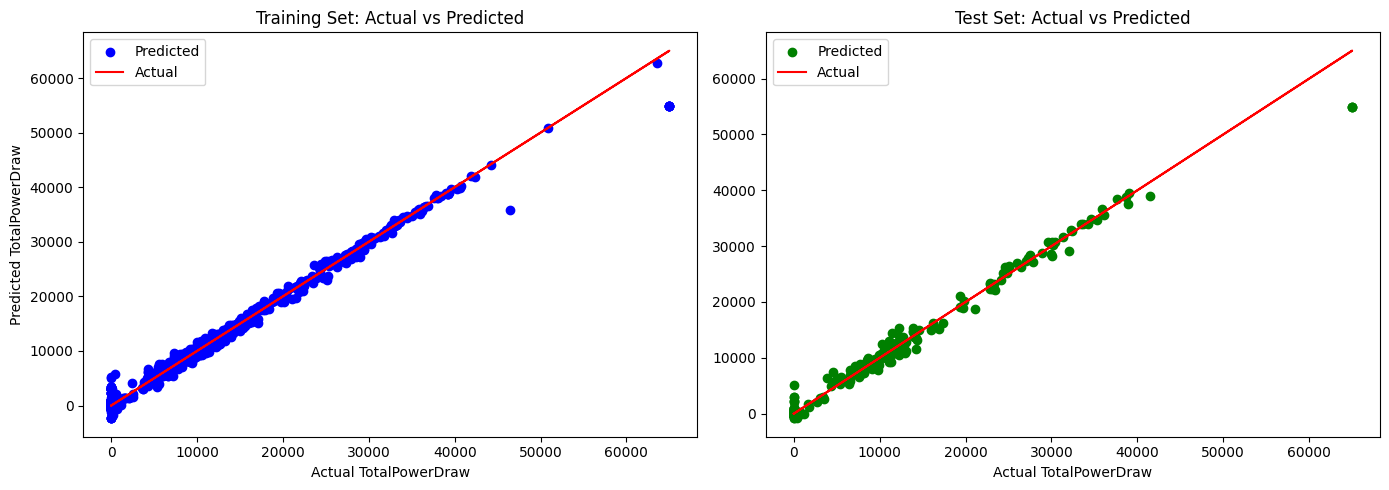

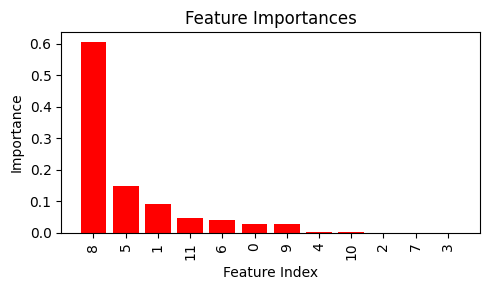

In [40]:
#GBM (Gradient Boosting Machine) 

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = gbm_regressor.predict(X_train)
y_test_pred = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Training R^2: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
axes[0].plot(y_train, y_train, color='red', label='Actual')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].set_xlabel('Actual TotalPowerDraw')
axes[0].set_ylabel('Predicted TotalPowerDraw')
axes[0].legend()

axes[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
axes[1].plot(y_test, y_test, color='red', label='Actual')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].set_xlabel('Actual TotalPowerDraw')
axes[1].legend()

plt.tight_layout()
plt.show()


# Extracting feature importances
feature_importances = gbm_regressor.feature_importances_

# Plotting feature importances
plt.figure(figsize=(5, 3))
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='red', align='center')
plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [42]:
#Apply the GBM model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", "MotorPowerDraw", "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new_gbm = df[feature_names]

# Drop the nans
X_new_cleaned_gbm = X_new_gbm.dropna()

# Making predictions

y_new_pred_gbm = gbm_regressor.predict(X_new_cleaned_gbm)

# Insert predictions into the cleaned DataFrame
X_new_cleaned_gbm['Predicted_TotalPowerDraw'] = y_new_pred_gbm

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions_gbm = df.merge(X_new_cleaned_gbm[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions_gbm['Percentage_Difference'] = (abs(df_with_predictions_gbm['TotalPowerDraw'] - df_with_predictions_gbm['Predicted_TotalPowerDraw']) / df_with_predictions_gbm['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions_gbm['Percentage_Difference'] = df_with_predictions_gbm['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print(df_with_predictions_gbm[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])

      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13069.647076               4.691879
1        9444.155245               8165.267101              13.541583
2       12075.898738              13029.328332               7.895310
3       40680.984837              40159.640103               1.281544
4        5412.054734               5506.002126               1.735891
...              ...                       ...                    ...
2662        0.000000               -648.383835                    NaN
2663        0.000000               -648.383835                    NaN
2664        0.000000               -648.383835                    NaN
2665        0.000000               -648.383835                    NaN
2666        0.000000               -648.383835                    NaN

[2654 rows x 3 columns]


Holt-Winters (Triple Exponential Smoothing), time series forecasting , useful for seasonal patterbs and clear trends ,  can use Additive or Multipiplicative Model . Additivie for constant seasonal variations, Multiplicative when seasonal variations are proportional to the data , the seasonal fluctuations grow or shrink in proportion to the series itself, calls for the multiplicative Holt-Winters method.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 108243823.053
R-squared (R²): -0.091


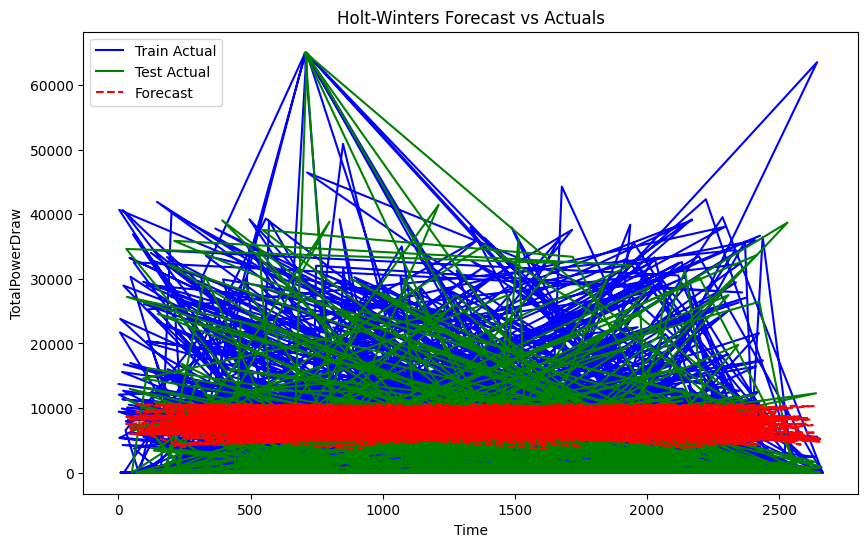

In [29]:
#Run holt-winters
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


# Fit the model
model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True).fit()

# Generate predictions
y_pred = model.forecast(len(y_test))


# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²): {r_squared:.3f}")

#Visualize
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Train Actual', color='blue')
plt.plot(y_test.index, y_test, label='Test Actual', color='green')
plt.plot(y_test.index, y_pred, label='Forecast', color='red', linestyle='--')
plt.title('Holt-Winters Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('TotalPowerDraw')
plt.legend()
plt.show()

